In [1]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where



In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=5, n_redundant=0,
	n_clusters_per_class=1, weights=[0.95], random_state=42)

Counter({0: 946, 1: 54})


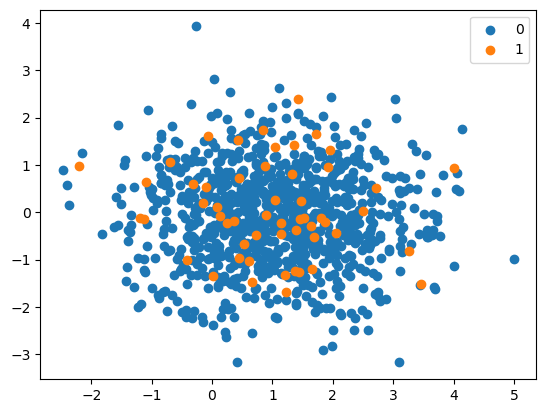

In [3]:
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [4]:
# Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(
             X, y, test_size = 0.4, random_state=42)

In [5]:
# define model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,ytrain)


DecisionTreeClassifier()

In [6]:
y_pred=model.predict(X_test)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[376   4]
 [  4  16]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       380
           1       0.80      0.80      0.80        20

    accuracy                           0.98       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.98      0.98      0.98       400



Counter({0: 942, 1: 942})


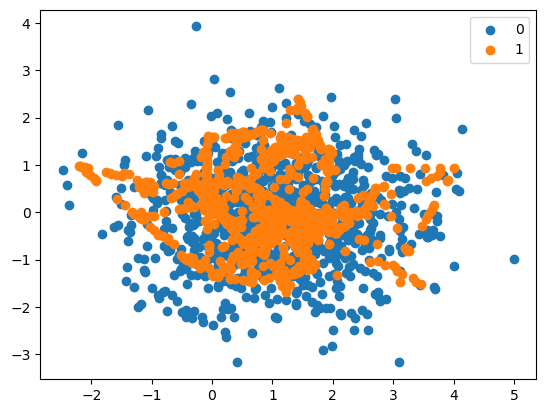

In [8]:
#Balancing with SMOTE and Tomeklinks:
from imblearn.combine import SMOTETomek
tl = SMOTETomek()
X_tl, y_tl = tl.fit_resample(X, y)
counter = Counter(y_tl)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_tl == label)[0]
	pyplot.scatter(X_tl[row_ix, 0], X_tl[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


In [9]:
# Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(
             X_tl, y_tl, test_size = 0.4, random_state=42)

In [10]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,ytrain)

DecisionTreeClassifier()

In [11]:
y_pred=model1.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[364  18]
 [  6 366]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       382
           1       0.95      0.98      0.97       372

    accuracy                           0.97       754
   macro avg       0.97      0.97      0.97       754
weighted avg       0.97      0.97      0.97       754

